# Project 2:  Battle weather

by Charles Roper, 11 September 2015

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.

I live in the historical town of Hastings, where the famous Battle of Hastings took place in the year 1066. The battle itself actually took place about 5 miles north-east of Hastings in a small town now called, appropriately enough, Battle. The clash took place on 14<sup>th</sup> October, well into the autumn season which is anecdotally known as a very wet and windy time year. Hardly ideal conditions for warring armies travelling on foot and horse, and armed with swords, axes, arrows and heavy armour. But is it really such a bad time of year for armies to engage? What would be the ideal time of year, based on contemporary weather data? Let's find out.

## Getting the data

We need the weather for Hastings, in southern England. If you haven't already downloaded the dataset for Hastings, [here is a direct link](http://www.wunderground.com/history/airport/EGMD/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1). Right-click on this and select Save Link As ... then, in the File dialogue that appears save the file with its default name of 'CustomHistory' to the folder you created for this course and where this notebook is located. Once the file has been downloaded rename it *from* 'CustomHistory.html' *to* 'Hastings_2014.csv'.

If that doesn't work, try getting the file from Weather Underground directly. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Hasting' in the 'Location' input box and when the pop up menu comes up with the option 'Hastings, United Kingdom' select it and then click on 'Submit'. 

When the next page opens click on the 'Custom' tab and selet the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed. Scroll to the end of the data  and then right click on the blue link labelled 'Comma Delimited File':

- if you are using the Safari Browser choose Download Linked File As ... 
- if you are using the Chrome Browser choose Save Link As ... 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped.

**Update**: The Hastings data had not precipitation, so I reverted to using London data. Just pretend it's really Hastings. It's only 60 miles difference anyway.

In [1]:
from pandas import *
hastings = read_csv('London_2014.csv', skipinitialspace=True)
hastings.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [2]:
hastings = hastings.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [3]:
hastings['WindDirDegrees'] = hastings['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [4]:
hastings['WindDirDegrees'] = hastings['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [5]:
hastings['GMT'] = to_datetime(hastings['GMT'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [6]:
hastings.index = hastings['GMT']

## Finding a good time to do battle

Fighting a battle in this period was an intensely physical affair. Not only were armour and weapons heavy, but with so many men on the field, mud would have been a problem in wet weath. [According to researchers](http://www.shape.com/fitness/cardio/whats-best-temperature-run), exercise is best done at lower temperatures. If you're running a marathon, the ideal temperature is just 11°C (51.8°F). Let's go with that. According to the history books, the battle took place on 14 October. Let's create a dataframe that holds the months of September to November. We're looking for low temperatures, but dry weather. Let's use the `datetime` index, like this:

In [7]:
battlezone = hastings.ix[datetime(2014,9,1) : datetime(2014,11,30)]

Let's now look for the days with cool temperatures. I'm going for a range between 10 and 12 mean degrees centigrade

In [8]:
coolTemps = battlezone[(battlezone['Mean TemperatureC'] >= 10) & (battlezone['Mean TemperatureC'] <= 12)]
coolTemps

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-10-05,2014-10-05,16,10,4,8,5,3,100,72,36,...,31,18,10,14,6,NaN,0.00,1,Fog,190
2014-10-06,2014-10-06,13,10,7,11,8,4,94,81,59,...,31,15,7,32,16,NaN,6.10,3,Rain,161
2014-10-07,2014-10-07,15,11,7,10,7,3,100,76,34,...,31,13,2,39,14,NaN,0.25,2,Rain,220
2014-10-08,2014-10-08,18,12,7,13,9,5,94,79,52,...,31,15,10,35,14,45,1.02,2,Rain,177
2014-10-12,2014-10-12,14,10,6,11,8,5,100,84,57,...,31,14,6,23,6,37,2.03,2,Fog-Rain,53
2014-10-13,2014-10-13,14,12,11,13,11,9,100,91,83,...,31,11,5,26,19,NaN,1.02,6,Rain,348
2014-10-21,2014-10-21,14,11,8,13,6,1,94,65,37,...,31,14,3,47,27,69,3.05,3,Rain,268
2014-10-22,2014-10-22,14,10,6,8,5,1,87,70,46,...,29,17,10,26,19,NaN,0.00,2,Rain,268
2014-10-25,2014-10-25,16,11,7,9,8,6,100,75,41,...,31,13,10,26,13,NaN,0.00,4,NaN,237


20 rows. That's pretty good. Let's plot a graph.

So next we tell Jupyter to display any graph created inside this notebook:

In [9]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the for our battle zone:

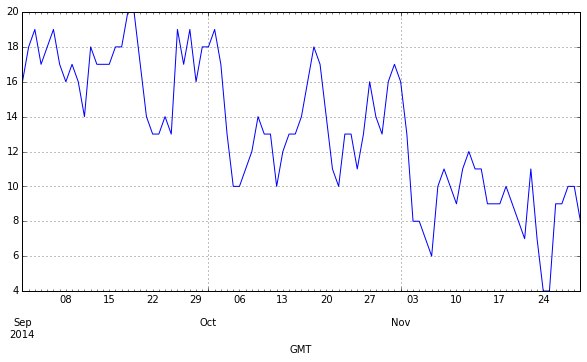

In [10]:
battlezone['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

I can see that there are a few days in October that in out range and a few days in November too. Let's narrow down our range and replot.

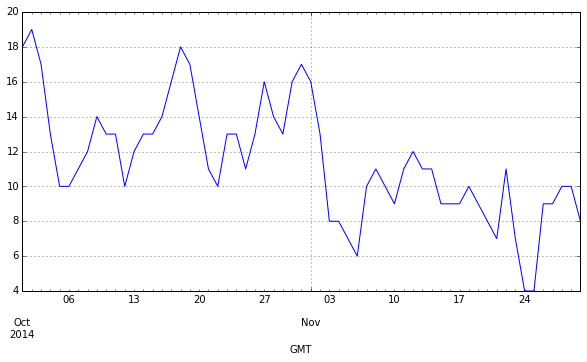

In [11]:
battlezone = hastings.ix[datetime(2014,10,1) : datetime(2014,11,30)]
battlezone['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

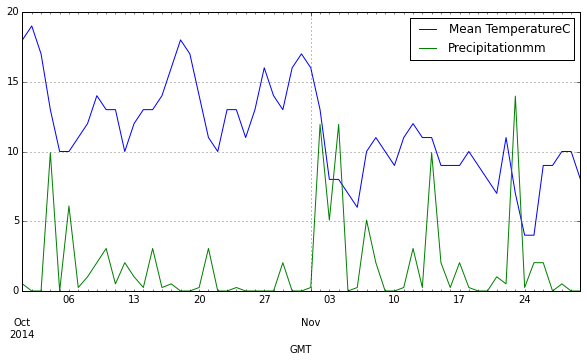

In [12]:
battlezone[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

October is definitely looking to be the drier month. Let's take a closer look. I'll add a second series (the `coolTemps` I created earlier) that plots dots on temperatures between 10 and 12 degrees.

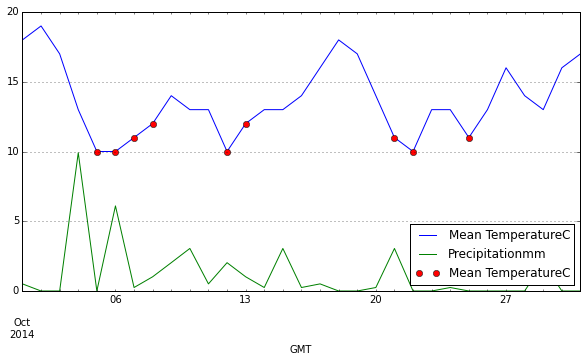

In [13]:
october = battlezone.ix[datetime(2014,10,1) : datetime(2014,10,31)]
octoberCoolTemps = coolTemps.ix[datetime(2014,10,1) : datetime(2014,10,31)]
seriesA = october[['Mean TemperatureC', 'Precipitationmm']]
seriesB = octoberCoolTemps[['Mean TemperatureC']]
ax = seriesA.plot(grid=True, figsize=(10,5))
seriesB.plot(grid=True, figsize=(10,5), linestyle='', marker='o', ax=ax)

Yes, October does look like a good month for this sort of battle. William chose well. It's not too hot or cold and not too wet. 

But what about the rest of the year? Let's do it!

To make it really clear what days have both cool temperatures AND low rain, I'll select down our series a bit more and plot some further dots.

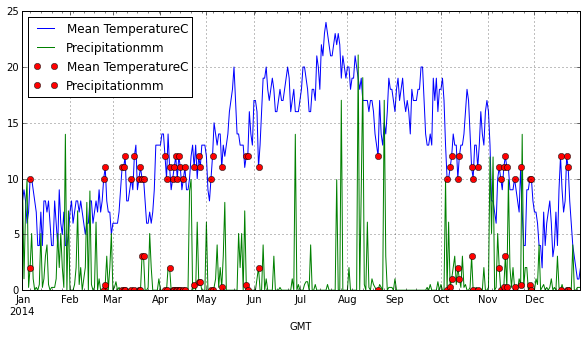

In [14]:
year = hastings.ix[datetime(2014,1,1) : datetime(2014,12,31)]
coolTemps = year[(year['Mean TemperatureC'] >= 10) & (year['Mean TemperatureC'] <= 12)]
lowRain = coolTemps[(coolTemps['Precipitationmm'] <= 5)]
ax = year[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))
lowRain[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5), linestyle='', marker='o', color='r', ax=ax)

## Conclusions

The graphs show that October is a pretty good month for the Battle of Hastings; you can see why William chose it. November is actually not bad either, but it's a bit volatile in terms of rain. At the other end of the year, March and April look like excellent candidates for waging war. Lots of red dots clustered on both months and really very low rainfall overall. If I were a war monger, I'd probably go for March and April, but I'd also be happy to take my chances in October, or even November.

To improve this analysis I'd probably add some calculations to see how many dots fall in each month. I also think some sort of trendline would be good. Not sure how to do that, though.